In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models





In [4]:
train_data_path = 'Facial_Images/train/'
val_data_path = 'Facial_Images/validation/'


In [5]:
import os

train_data_path = r"C:\Users\sayee\Facial_Emotion_detection\Facial_Images\train"

total_images = 0

for expression in os.listdir(train_data_path):
    folder_path = os.path.join(train_data_path, expression)
    image_count = len(os.listdir(folder_path))
    print(f"{expression}: {image_count} images")
    total_images += image_count

print("\nTotal training images:", total_images)



angry: 3993 images
disgust: 436 images
fear: 4103 images
happy: 7164 images
neutral: 4982 images
sad: 4938 images
surprise: 3205 images

Total training images: 28821


In [6]:
import os

validation_data_path = r"C:\Users\sayee\Facial_Emotion_detection\Facial_Images\validation"

total_images = 0

for expression in os.listdir(validation_data_path):
    folder_path = os.path.join(validation_data_path, expression)
    image_count = len(os.listdir(folder_path))
    print(f"{expression}: {image_count} images")
    total_images += image_count
    

print("\nTotal validation images:", total_images)


angry: 960 images
disgust: 111 images
fear: 1018 images
happy: 1825 images
neutral: 1216 images
sad: 1139 images
surprise: 797 images

Total validation images: 7066


In [7]:
import os

train_data_path = r"C:\Users\sayee\Facial_Emotion_detection\Facial_Images\train"

emotions = os.listdir(train_data_path)

print("Emotions found in dataset:")
for emotion in emotions:
    print("-", emotion)


Emotions found in dataset:
- angry
- disgust
- fear
- happy
- neutral
- sad
- surprise


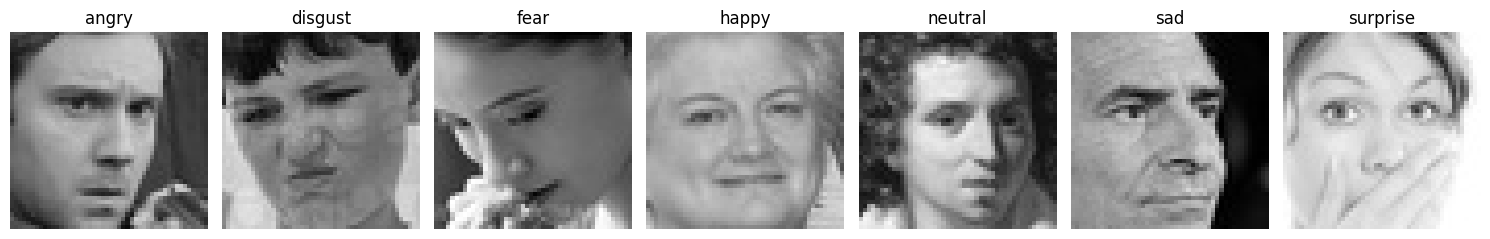

In [8]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

train_data_path = r"C:\Users\sayee\Facial_Emotion_detection\Facial_Images\train"

plt.figure(figsize=(15, 5))
i = 1
emotions = os.listdir(train_data_path)

for expression in emotions:
    folder_path = os.path.join(train_data_path, expression)
    image_name = os.listdir(folder_path)[0]
    image_path = os.path.join(folder_path, image_name)

    image = load_img(image_path)
    
    plt.subplot(1, len(emotions), i)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    i += 1

plt.tight_layout()
plt.show()


In [9]:
train_data_gen = ImageDataGenerator()

train_dataset = train_data_gen.flow_from_directory(
    train_data_path,
    shuffle=True,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)


Found 28821 images belonging to 7 classes.


In [10]:
val_data_gen = ImageDataGenerator()

val_dataset = val_data_gen.flow_from_directory(
    val_data_path,
    shuffle=False,
    target_size=(48,48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)


Found 7066 images belonging to 7 classes.


In [11]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dropout

model = models.Sequential()

# ✅ Input layer
model.add(layers.Input(shape=(48, 48, 1)))  # grayscale image of size 48x48

# 🔷 Conv Block 1
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 🔷 Conv Block 2
model.add(layers.Conv2D(128, (5,5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 🔷 Conv Block 3
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 🔷 Conv Block 4
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 🔷 Conv Block 5
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 🔶 Flatten and Dense Layers
model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(Dropout(0.25))

# 🔚 Output Layer (for 7 classes, e.g., emotions)
model.add(layers.Dense(7, activation='softmax'))

# 🔍 Model Summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 1, 1, 512)           │              

 Total params: 4,148,615 (15.83 MB)

 Trainable params: 4,144,903 (15.81 MB)

 Non-trainable params: 3,712 (14.50 KB)

In [12]:
model = tf.keras.models.load_model(r'C:\Users\sayee\Facial_Emotion_detection\face_emotion_classificationnn.keras')


In [14]:
import cv2
image = cv2.imread('Google_Images/Happy.jpg')[:, :, 0]
image = cv2.resize(image, (48, 48))
image = np.invert(np.array([image]))


In [15]:
output = model.predict(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step


In [16]:
np.argmax(output)



np.int64(2)

In [17]:
data = emotions[np.argmax(output)]


In [18]:
data[0]

'f'